# 1. Opening and cleaning

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
columns_to_keep = ["BindingDB Reactant_set_id",
                    "SMILES",
                    "Ligand InChI",
                    "InChI_Key",
                    "BindingDB_ID",
                    "BindingDB Ligand Name",
                    "Target Name",
                    "Target Source Organism According to Curator or DataSource",
                    "Ki (nM)",
                    "IC50 (nM)",
                    "Kd (nM)",
                    "EC50 (nM)",
                    "kon (M-1-s-1)",
                    "koff (s-1)",
                    "pH",
                    "Temp (C)",
                    "Curation/DataSource",
                    "Article DOI",
                    "BindingDB Entry DOI",
                    "PMID",
                    "PubChem AID",
                    "Patent Number",
                    "Authors",
                    "Institution",
                    "Link to Ligand in BindingDB",
                    "Link to Target in BindingDB",
                    "Link to Ligand-Target Pair in BindingDB",
                    "Ligand HET ID in PDB",
                    "PDB ID(s) for Ligand-Target Complex",
                    "PubChem_CID",
                    "PubChem SID",
                    "ChEBI_ID",
                    "ChEMBL_ID",
                    "DrugBank_ID",
                    "IUPHAR_GRAC ID of Ligand",
                    "KEGG_ID",
                    "ZINC_ID",
                    "Number of Protein Chains in Target (>1 implies a multichain complex)",
                    "BindingDB Target Chain Sequence",
                    "PDB ID(s) of Target Chain",
                    "UniProt (SwissProt) Recommended Name of Target Chain",
                    "UniProt (SwissProt) Entry Name of Target Chain",
                    "UniProt (SwissProt) Primary ID of Target Chain",
                    "UniProt (SwissProt) Secondary ID(s) of Target Chain",
                    "UniProt (SwissProt) Alternative ID(s) of Target Chain",
                    "UniProt (TrEMBL) Submitted Name of Target Chain",
                    "UniProt (TrEMBL) Entry Name of Target Chain",
                    "UniProt (TrEMBL) Primary ID of Target Chain",
                    "UniProt (TrEMBL) Secondary ID(s) of Target Chain",
                    "UniProt (TrEMBL) Alternative ID(s) of Target Chain",
                    "Unique_ID",
                    "SMILES_BindingDB",
                    "InChI_Key_BindingDB",
                    "BindingDB_ID_BindingDB",
                    "ChEBI_ID_BindingDB",
                    "ChEMBL_ID_BindingDB",
                    "DrugBank_ID_BindingDB",
                    "DrugBank_ID_DrugBank",
                    "drugbank_drug_name",
                    "unii",
                    "toxicity",
                    "class_kingdom",
                    "class_superclass",
                    "synonyms",
                    "categories",
                    "drugbank_drug_patent_approved",
                    "interaction",
                    "ChEMBL_ID_DrugBank",
                    "SMILES_DrugBank",
                    "InChI_Key_DrugBank",
                    "ChEBI_ID_DrugBank",
                    "BindingDB_ID_DrugBank",
                    "Unique_DrugBank_ID",
                    "Matched_On",
                    "drugbank_swissprot_id",
                    "name_y",
                    "general-function",
                    "specific-function",
                    "organism"]

In [5]:
# Load only the first 1000000 rows of the dataset with the columns specified in columns_to_keep
# df = pd.read_csv('data/clean/Merged_Binding_DrugBank_with_Proteins.csv', nrows=1000000,usecols=columns_to_keep)
# load the first million datapoints from "data/clean/merged_dataframe.pkl" using the columns from columns_to_keep
df = pd.read_pickle('data/clean/merged_dataframe.pkl')


In [6]:
cancer_df = pd.read_pickle('data/clean/ligands_related_to_cancer_proteins.pkl')

In [7]:
len(df)

2927609

In [8]:
df.columns

Index(['ki', 'ph', 'temp', 'ic50', 'ec50', 'kd', 'kon', 'koff', 'doi',
       'target_name', 'ligand_name', 'pubchem_cid', 'chebi_id', 'chembl_id',
       'drugbank_id', 'kegg_id', 'zinc_id', 'smiles', 'inchi_key',
       'bindingdb_id', 'swissprot_target_chain_name',
       'swissprot_target_chain_entry_name', 'swissprot_protein_id',
       'Unique_ID', 'drugbank_drug_name', 'drugbank_drug_unii',
       'drugbank_drug_toxicity', 'drugbank_drug_class_kingdom',
       'drugbank_drug_class_superclass', 'drugbank_drug_synonyms',
       'drugbank_drug_categories', 'drugbank_drug_patent_approved',
       'drugbank_drug_interaction', 'Matched_On', 'drugbank_protein_name',
       'drugbank_protein_general_function',
       'drugbank_protein_specific_function', 'drugbank_protein_organism'],
      dtype='object')

In [9]:
# # keep only the columns columns_to_keep
# df = df[columns_to_keep]
# df.head()

In [10]:
df_matched = df[df['Matched_On'].isna() == False]
cancer_df_matched = cancer_df[cancer_df['Matched_On'].isna() == False]

# 2. Looking in

In [11]:
grouped_df

NameError: name 'grouped_df' is not defined

In [63]:
print("Number of matched elements :",len(df_matched),"out of",len(df), "=",np.round(len(df_matched)/len(df) *100,2),"%")
print("Number of approved patents :",len(df_matched[df_matched["drugbank_drug_patent_approved"].isna() == False]),"out of",len(df_matched),"=",np.round(len(df_matched[df_matched["drugbank_drug_patent_approved"].isna() == False])/len(df_matched) *100,2),"%")

Number of matched elements : 151443 out of 2927609 = 5.17 %
Number of approved patents : 57080 out of 151443 = 37.69 %


### Looking into the columns of the Nth matched row

In [64]:
# Print the Nth row of the dataframe using a loop to go through each column
N = 12

i = 0
for index, row in df_matched.iterrows():
    if i != N:
        i+=1
        continue
    for column in df_matched.columns:
        print(f"{column} :                                          {row[column]}")
    break

ki :                                          1.1
ph :                                          5.0
temp :                                          30.0
ic50 :                                          <NA>
ec50 :                                          <NA>
kd :                                          <NA>
kon :                                          <NA>
koff :                                          <NA>
doi :                                          10.1021/jm0011171
target_name :                                          Dimer of Gag-Pol polyprotein [489-587]
ligand_name :                                          (2R,3R,4R,5R)-3,4-dihydroxy-N,N'-bis[(1S,2R)-2-hydroxy-2,3-dihydro-1H-inden-1-yl]-2,5-bis(2-phenylethyl)hexanediamide::Diol-Based HIV-1 protease inhibitor 4::N1,N6 -Bis[(2R)-hydroxy-(1S)-indanyl]-(2R,3R,4R,5R)-3,4-dihydroxy-2,5-bis(2-phenylethyl)hexanediamide
pubchem_cid :                                          449129
chebi_id :                                       

### Unique ligands per drug

In [65]:
print("Number of rows with Fenoterol :",len(df.loc[df["drugbank_drug_name"] == "Fenoterol"]))
# print(df.loc[df["drugbank_drug_name"] == "Fenoterol", "drugbank_drug_patent_approved"])
print("\nUnique protein :\n",df.loc[df["drugbank_drug_name"] == "Fenoterol", "inchi_key"].unique())
print("\nUnique ligands :\n",df.loc[df["drugbank_drug_name"] == "Fenoterol", "ligand_name"].unique())

# print(df.loc[df["drugbank_drug_name"] == "Indinavir", "InChI_Key_BindingDB"].is_unique())

Number of rows with Fenoterol : 59

Unique protein :
 <StringArray>
['LSLYOANBFKQKPT-UHFFFAOYSA-N', 'LSLYOANBFKQKPT-DIFFPNOSSA-N',
 'LSLYOANBFKQKPT-GTNSWQLSSA-N', 'LSLYOANBFKQKPT-PIGZYNQJSA-N',
 'LSLYOANBFKQKPT-APPDUMDISA-N']
Length: 5, dtype: string

Unique ligands :
 <StringArray>
['5-(1-hydroxy-2-(1-(4-hydroxyphenyl)propan-2-ylamino)ethyl)benzene-1,3-diol::5-{1-Hydroxy-2-[2-(4-hydroxy-phenyl)-1-methyl-ethylamino]-ethyl}-benzene-1,3-diol::CHEMBL32800::FENOTEROL',
                                                                                    '(R,R)-(-)-fenoterol::CHEMBL388570::US10617654, Compound (R,R)-1::US9492405, (R,R)-1::US9492405, 28',
                                                                                    '(R,S)-(-)-fenoterol::CHEMBL229476::US10617654, Compound (R,S)-1::US9492405, (R,S)-1::US9492405, 29',
                                                                                    '(S,R)-(+)-fenoterol::CHEMBL229477::US10617654, Compound (S,R)-1::US949240

### Grouping by drug
The columns for this are : 
- the number of entries for that drug
- the number rows that have an approved patent

In [66]:
grouped_df = df_matched.groupby("drugbank_drug_name").agg({
    "drugbank_drug_name": "count",
    "drugbank_drug_patent_approved": lambda x: x.notna().sum(),
    "drugbank_drug_toxicity": lambda x: x.unique(),
    "inchi_key" : lambda x: x.unique(),
    "ligand_name" : lambda x: x.unique()
}).rename(columns={"drugbank_drug_name": "count"}).sort_values(by="count", ascending=False)

grouped_df["num_prot_per_drug"] = grouped_df["inchi_key"].apply(lambda x: len(x))
grouped_df["num_lig_per_drug"] = grouped_df["ligand_name"].apply(lambda x: len(x))

grouped_df["unique_toxicity"] = grouped_df["drugbank_drug_toxicity"].apply(lambda x: x[0] )
grouped_df["num_diff_toxicity"] = grouped_df["drugbank_drug_toxicity"].apply(lambda x: len(x) )

grouped_df.head()

,count,drugbank_drug_patent_approved,drugbank_drug_toxicity,inchi_key,ligand_name,num_prot_per_drug,num_lig_per_drug,unique_toxicity,num_diff_toxicity
drugbank_drug_name,,,,,,,,,
Staurosporine,2369,0,[nan],"[HKSZLNNOFSGOKW-FYTWVXJKSA-N, HKSZLNNOFSGOKW-U...","[(2S,3R,4R,6R)-3-methoxy-2-methyl-4-(methylami...",2,4,NaN,1
Acetazolamide,2344,0,[nan],[BZKPWHYZMXOIDC-UHFFFAOYSA-N],"[AZA::AZA2::AZM acetazolamide::Acerazolamide, ...",1,1,NaN,1
Vorinostat,1736,1736,[nan],[WAEXFXRVDQXREF-UHFFFAOYSA-N],[CHEMBL98::N-hydroxy-N'-phenyloctanediamide::S...,1,1,NaN,1
Sunitinib,1692,1692,"[The maximally tolerated dose for rat, mouse, ...",[WINHZLLDWRZWRT-ATVHPVEESA-N],[CHEMBL535::N-[2-(diethylamino)ethyl]-5-[(Z)-(...,1,2,"The maximally tolerated dose for rat, mouse, a...",1
Sorafenib,1660,1660,[The oral lowest published toxic dose (Toxic D...,[MLDQJTXFUGDVEO-UHFFFAOYSA-N],[4-[4-({[4-chloro-3-(trifluoromethyl)phenyl]ca...,1,2,The oral lowest published toxic dose (Toxic Do...,1


In [67]:
grouped_df_cancer = cancer_df_matched.groupby("drugbank_drug_name").agg({
    "drugbank_drug_name": "count",
    "drugbank_drug_patent_approved": lambda x: x.notna().sum(),
    "drugbank_drug_toxicity": lambda x: x.unique(),
    "inchi_key" : lambda x: x.unique(),
    "ligand_name" : lambda x: x.unique()
}).rename(columns={"drugbank_drug_name": "count"}).sort_values(by="count", ascending=False)

grouped_df_cancer["num_prot_per_drug"] = grouped_df_cancer["inchi_key"].apply(lambda x: len(x))
grouped_df_cancer["num_lig_per_drug"] = grouped_df_cancer["ligand_name"].apply(lambda x: len(x))

grouped_df_cancer["unique_toxicity"] = grouped_df_cancer["drugbank_drug_toxicity"].apply(lambda x: x[0] )
grouped_df_cancer["num_diff_toxicity"] = grouped_df_cancer["drugbank_drug_toxicity"].apply(lambda x: len(x) )

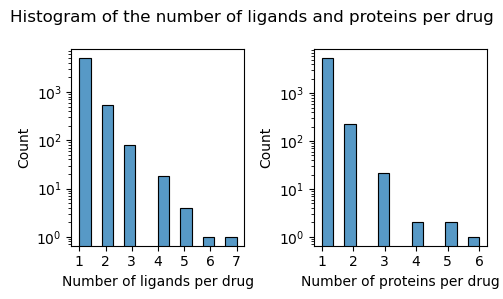

In [68]:
fig,axs = plt.subplots(1,2,figsize=(5,3))

# ligands
sns.histplot(grouped_df["num_lig_per_drug"],ax=axs[0])
axs[0].set_yscale("log")
axs[0].set_xlabel("Number of ligands per drug")
axs[0].set_xticks(np.arange(1, 8, 1))

# proteins
sns.histplot(grouped_df["num_prot_per_drug"], ax=axs[1])
axs[1].set_yscale("log")
axs[1].set_xlabel("Number of proteins per drug")
axs[1].set_xticks(np.arange(1, 7, 1))

plt.suptitle("Histogram of the number of ligands and proteins per drug")
plt.tight_layout()

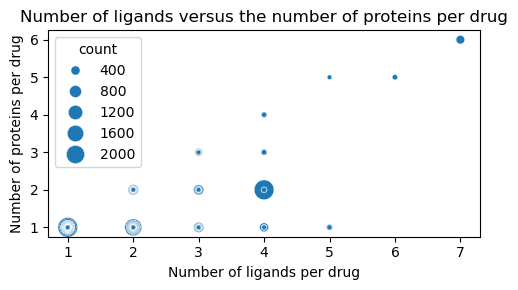

In [69]:
# plot of the number of ligand versus the number of proteins per drug
plt.figure(figsize=(5,3))
sns.scatterplot(data=grouped_df, x="num_lig_per_drug", y="num_prot_per_drug",size="count",sizes=(10, 200))
plt.xlabel("Number of ligands per drug")
plt.ylabel("Number of proteins per drug")
plt.title("Number of ligands versus the number of proteins per drug")
plt.tight_layout()


In [70]:
grouped_df.loc[grouped_df["num_lig_per_drug"]>1]

,count,drugbank_drug_patent_approved,drugbank_drug_toxicity,inchi_key,ligand_name,num_prot_per_drug,num_lig_per_drug,unique_toxicity,num_diff_toxicity
drugbank_drug_name,,,,,,,,,
Staurosporine,2369,0,[nan],"[HKSZLNNOFSGOKW-FYTWVXJKSA-N, HKSZLNNOFSGOKW-U...","[(2S,3R,4R,6R)-3-methoxy-2-methyl-4-(methylami...",2,4,NaN,1
Sunitinib,1692,1692,"[The maximally tolerated dose for rat, mouse, ...",[WINHZLLDWRZWRT-ATVHPVEESA-N],[CHEMBL535::N-[2-(diethylamino)ethyl]-5-[(Z)-(...,1,2,"The maximally tolerated dose for rat, mouse, a...",1
Sorafenib,1660,1660,[The oral lowest published toxic dose (Toxic D...,[MLDQJTXFUGDVEO-UHFFFAOYSA-N],[4-[4-({[4-chloro-3-(trifluoromethyl)phenyl]ca...,1,2,The oral lowest published toxic dose (Toxic Do...,1
Midostaurin,1157,1157,[In a fertility study involving female and mal...,[BMGQWWVMWDBQGC-IIFHNQTCSA-N],"[CHEMBL608533::PKC-412::US20240132489, Compoun...",1,2,In a fertility study involving female and male...,1
Imatinib,1137,1137,[The most frequently reported adverse reaction...,[KTUFNOKKBVMGRW-UHFFFAOYSA-N],[4-[(4-methylpiperazin-1-yl)methyl]-N-[4-methy...,1,2,The most frequently reported adverse reactions...,1
...,...,...,...,...,...,...,...,...,...
Norvaline,2,0,[nan],"[SNDPXSYFESPGGJ-BYPYZUCNSA-M, SNDPXSYFESPGGJ-B...","[L-Norvaline, NORVALINE]",2,2,NaN,1
(4E)-N-(4-fluorophenyl)-4-[(phenylcarbonyl)imino]-4H-pyrazole-3-carboxamide,2,0,[nan],[ZMWYSLJBNJUCRK-UHFFFAOYSA-N],[4-N-benzene-3-N-(4-fluorophenyl)-1H-pyrazole-...,1,2,NaN,1
AL7099A,2,0,[nan],"[RMOXCYSVWCHXII-LBPRGKRZSA-N, RMOXCYSVWCHXII-G...","[(4R)-2-(3-methoxyphenyl)-4-(methylamino)-1,1-...",2,2,NaN,1


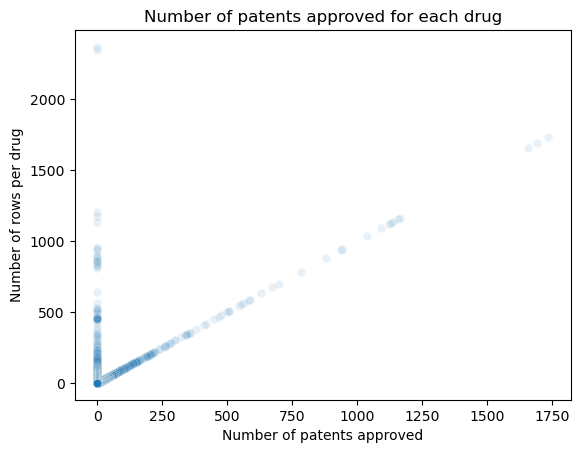

In [71]:
# plot the number of patents approved for each drug

# sns.histplot(grouped_df.loc[grouped_df["drugbank_drug_patent_approved"]!=0,"drugbank_drug_patent_approved"], bins=100, kde=True)
sns.scatterplot(grouped_df,x="drugbank_drug_patent_approved",y="count",alpha=0.1)
plt.xlabel("Number of patents approved")
plt.ylabel("Number of rows per drug")
plt.title("Number of patents approved for each drug")
plt.show()


In [72]:
# create a loggistic regression test betwwen df_matched["drugbank_drug_patent_approved"] and df_matched["toxicity"].isna()
import statsmodels.api as sm
import statsmodels.formula.api as smf

df_test = df_matched[["drugbank_drug_patent_approved","drugbank_drug_toxicity"]].notna().astype(int)
df_test
mod = smf.ols(formula='drugbank_drug_patent_approved ~ C(drugbank_drug_toxicity)', data=df_test)
res = mod.fit()
print(res.summary())


                                  OLS Regression Results                                 
Dep. Variable:     drugbank_drug_patent_approved   R-squared:                       0.447
Model:                                       OLS   Adj. R-squared:                  0.447
Method:                            Least Squares   F-statistic:                 1.226e+05
Date:                           Fri, 13 Dec 2024   Prob (F-statistic):               0.00
Time:                                   15:13:21   Log-Likelihood:                -60272.
No. Observations:                         151443   AIC:                         1.205e+05
Df Residuals:                             151441   BIC:                         1.206e+05
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-

<Axes: xlabel='drugbank_drug_patent_approved', ylabel='drugbank_drug_toxicity'>

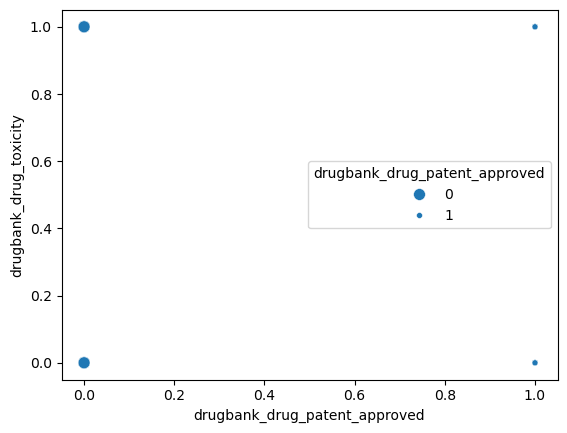

In [73]:
sns.scatterplot(df_test,x="drugbank_drug_patent_approved",y="drugbank_drug_toxicity",size="drugbank_drug_patent_approved")

In [74]:
# test correlation between toxicity and drugbank_drug_patent_approved which are binary variables
from scipy.stats import chi2_contingency
crosstab = pd.crosstab(df_test["drugbank_drug_patent_approved"],df_test["drugbank_drug_toxicity"])
chi2, p, dof, expected = chi2_contingency(crosstab)
print("chi2 :",chi2)
print("p :",p)
print("dof :",dof)
print("expected :",expected)

chi2 : 67750.25949274076
p : 0.0
dof : 1
expected : [[52271.85431482 42091.14568518]
 [31619.14568518 25460.85431482]]


In [75]:
# since the p-value is very low and a chi2 of 6731.7, having used the chi2 test, we can conclude that the two variables are correlated

<Axes: xlabel='drugbank_drug_patent_approved', ylabel='num_diff_toxicity'>

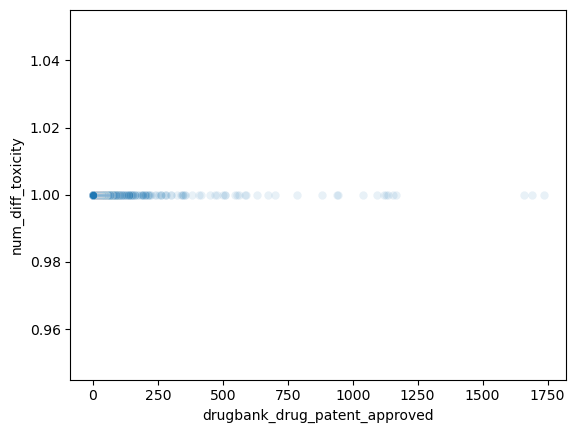

In [76]:
# seaborn plot of a 1D density plot of the number of different toxicities per drug
sns.scatterplot(grouped_df,x="drugbank_drug_patent_approved",y="num_diff_toxicity",alpha = 0.1)


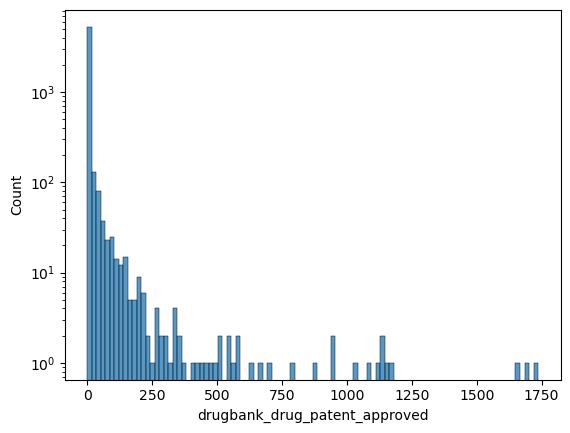

In [77]:
sns.histplot(grouped_df,x="drugbank_drug_patent_approved",bins=100)
plt.yscale("log")

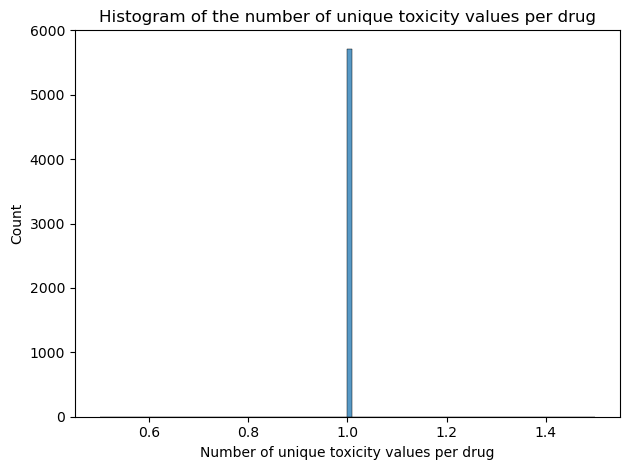

In [78]:
# plot the the number of unique toxicity values per drug
# plt.figure(figsize=(5,5))
sns.histplot(grouped_df["num_diff_toxicity"], bins=100)
# plt.yscale("log")
plt.xlabel("Number of unique toxicity values per drug")
plt.title("Histogram of the number of unique toxicity values per drug")
# lowering the number of ticks on the x-axis to integers
# plt.xticks(np.arange(1, 6, 1))
plt.tight_layout()


In [79]:
print("Total number of drugs :                  ",len(grouped_df))
print("Number of drugs with a toxicity report : ",sum(grouped_df["num_diff_toxicity"])) 
print("Number of unique toxicity reports :      ",len(grouped_df["unique_toxicity"].unique()))

Total number of drugs :                   5716
Number of drugs with a toxicity report :  5716
Number of unique toxicity reports :       1397


In [80]:
len(df["inchi_key"].unique()), len(df["drugbank_protein_name"].unique())

(1212306, 280)

# Toxicity score

In [81]:
# Making a large string of all toxicity reports text
unique_toxicity_values = " ".join(grouped_df["unique_toxicity"].unique().astype(str))

In [82]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(unique_toxicity_values)

In [83]:
# Count the occurances of each word in that sting

from collections import Counter

words = [token.text for token in doc]

# five most common tokens
word_freq = Counter(words)
common_words = word_freq.most_common(5)

print(common_words)

[(',', 9840), ('of', 4577), ('.', 4334), ('and', 4304), ('in', 3832)]


In [84]:
# drop punctuation and stop words
words = [token.text for token in doc if token.is_stop != True and token.is_punct != True]

# most common tokens
word_freq = Counter(words)
common_words = word_freq.most_common(1000000)

common_words

[('mg', 1779),
 ('kg', 1511),
 ('\r\n\r\n', 1211),
 ('overdose', 1003),
 ('>', 719),
 ('rats', 693),
 ('dose', 680),
 ('effects', 647),
 ('<', 611),
 ('patients', 560),
 ('oral', 559),
 ('doses', 547),
 ('LD', 538),
 ('include', 507),
 ('sub>50</sub', 460),
 ('studies', 456),
 ('adverse', 447),
 ('day', 415),
 ('human', 412),
 ('times', 400),
 ('mice', 367),
 ('toxicity', 361),
 ('reported', 351),
 ('LD50', 348),
 ('recommended', 339),
 ('FDA', 339),
 ('drug', 319),
 ('nausea', 309),
 ('symptoms', 304),
 ('rat', 298),
 ('supportive', 295),
 ('use', 286),
 ('risk', 282),
 ('vomiting', 273),
 ('Oral', 269),
 ('observed', 263),
 ('Label', 261),
 ('increased', 254),
 ('clinical', 247),
 ('treatment', 242),
 (' ', 236),
 ('hypotension', 232),
 ('administration', 224),
 ('associated', 222),
 ('Symptoms', 219),
 ('mouse', 215),
 ('severe', 213),
 ('including', 211),
 ('\r\n', 207),
 ('renal', 204),
 ('overdosage', 203),
 ('potential', 201),
 ('administered', 196),
 ('reactions', 192),
 ('preg

Hand picked words 

In [85]:
toxicity_related_frequent_words = ["overdose","adverse",'toxicity','LD50','nausea','vomiting','renal','hypotension','severe',
                                   'pain','fetal','pregnancy','reactions','fertility','blood','cardiac',"overdosage",'respiratory'
                                   ,'symptomatic','diarrhea','acute','headache','gastrointestinal','depression',"dizziness","coma",
                                   'liver','failure','mutagenic','acid','heart','abdominal','bradycardia','impairment','convulsions',
                                   'hypertension','anemia','anaphylactic','anaphylaxis','arrhythmias','arrhythmia','asthma','bronchospasm',
                                   'bronchial','cancer','carcinogenic','carcinogenicity','cardiotoxicity','cardiovascular','gastric',
                                   'seizures','confusion','hepatic',"carcinogenicity",'death','rash','mutation','arrhythmias']

medical_conditions = [
    "overdose",
    "patients",
    "effects",
    "adverse",
    "toxicity",
    "symptoms",
    "nausea",
    "vomiting",
    "treatment",
    "renal",
    "hypotension",
    "pregnancy",
    "severe",
    "pain",
    "fetal",
    "reactions",
    "fertility",
    "cardiac",
    "diarrhea",
    "headache",
    "gastrointestinal",
    "depression",
    "dizziness",
    "coma",
    "respiratory",
    "symptomatic",
    "diarrhea",
    "acne",
    "liver",
    "failure",
    "drowsiness",
    "seizures",
    "muscle",
    "maternal",
    "gastric",
    "hypertension",
    "death",
    "rash",
    "bladder",
    "edema",
    "children",
    "weakness",
    "insomnia",
    "syndrome",
    "anemia",
    "tumors",
    "acidosis",
    "impaired",
    "infant",
    "pediatric",
    "hallucinations",
    "nervous",
    "irritation",
    "fever",
    "constipation",
    "adenomas",
    "birth",
    "gestation",
    "developmental",
    "prolonged",
    "mutagenicity",
    "lethal",
    "fatigue",
    "sedation",
    "thrombocytopenia",
    "bradycardia",
    "tachycardia",
    "convulsions",
    "arrhythmias",
    "CNS",
    "somnolence",
    "hemodialysis",
    "breast",
    "acne",
    "hepatotoxicity",
    "pulmonary",
    "malformations",
    "thrombocytopenia",
    "lactation",
    "ventricular",
    "sweating",
    "atropine",
    "kidney",
    "hepatotoxicity",
    "restlessness",
    "seizure",
    "emesis",
    "adrenal",
    "carcinomas",
    "neutropenia",
    "allergy",
    "toxicity",
    "arrhythmias",
    "death",
    "hypertension",
]

In [86]:
# very high severity side effects of cancer related drugs
high_severity = ["cancer","coma","severe","overdose","death","lethal","serious","life-threatening","life threatening","strokes","fatal","mortality"]

In [87]:

toxicity_related_frequent_words = np.unique(list(set(toxicity_related_frequent_words + medical_conditions)))

low_severity = []
for word in toxicity_related_frequent_words:
    if word not in high_severity:
        low_severity.append(word)


In [1]:
import re
from bs4 import BeautifulSoup  # Use BeautifulSoup for HTML tag removal

# Function to parse text anad find lowest LD50 value if there is any
def parse_lowest_ld50(report):
    clean_report = BeautifulSoup(report, "html.parser").get_text()
    matches = re.findall(r"LD50[^\d]*(\d+)\s*", clean_report, re.IGNORECASE)
    if matches:
        # Convert matches to int and find the minimum
        ld50_values = list(map(int, matches))
        return min(ld50_values)
    return np.nan  # No LD50 value found


# Assign toxicity score based on lowest LD50 value
def assign_severity_score(ld50):
    if ld50 is None:
        return None  # No value, no score
    elif ld50 <= 50:
        return 20  # Extremely toxic
    elif ld50 <= 300:
        return 10  # Highly toxic
    elif ld50 <= 1000:
        return 5  # Moderately toxic
    elif ld50 <= 5000:
        return 2  # Slightly toxic
    else:
        return 0  # Practically non-toxic

## Toxicity scoring 
The toxicity score is made from adding the score from a possible LD50 value, and weighted number of severity/toxicity/... related words. This score is then normalized by the word length of the toxicity report.

In [ ]:
# add a count of the number of times each word appears in the toxicity string of each drug
# grouped_df["toxicity_score"] = grouped_df["unique_toxicity"].apply(lambda x: sum(1 for word in toxicity_related_frequent_words if word in str(x)))
# grouped_df["toxicity_score_normalized"] = grouped_df["unique_toxicity"].apply(lambda x: (sum(1 for word in toxicity_related_frequent_words if (word in str(x))) / len(str(x).split()) if len(str(x).split()) != 0 else 0))
# grouped_df["weighted_toxicity_score_normalized"] = grouped_df["unique_toxicity"].apply(lambda x: ((sum(3 for word in high_severity if word in str(x)) + sum(1 for word in low_severity if word in str(x))) / len(str(x).split()) if len(str(x).split()) != 0 else 0))
# grouped_df["toxicity_score_normalized"] = grouped_df["toxicity_score"].apply(lambda x: x/len(str(x).split()) if len(str(x).split()) != 0 else 0)
grouped_df["final_toxicity_score"] =  grouped_df["unique_toxicity"].apply(lambda x: (sum(3 for word in high_severity if word in str(x)) + sum(1 for word in low_severity if word in str(x)) + int(assign_severity_score(parse_lowest_ld50(str(x))))) )
grouped_df["final_toxicity_score"] =  grouped_df["final_toxicity_score"]/grouped_df["unique_toxicity"].apply(lambda x: len(str(x).split()) if len(str(x).split()) != 0 else 0)

grouped_df["final_toxicity_score_log"] =  grouped_df["unique_toxicity"].apply(lambda x: (sum(3 for word in high_severity if word in str(x)) + sum(1 for word in low_severity if word in str(x)) + int(assign_severity_score(parse_lowest_ld50(str(x))))) )
grouped_df["final_toxicity_score_log"] =  grouped_df["final_toxicity_score"]/np.log(grouped_df["unique_toxicity"].apply(lambda x: len(str(x).split()) if len(str(x).split()) != 0 else 0))

NameError: name 'grouped_df' is not defined

In [107]:
grouped_df_cancer["final_toxicity_score"] =  grouped_df_cancer["unique_toxicity"].apply(lambda x: (sum(3 for word in high_severity if word in str(x)) + sum(1 for word in low_severity if word in str(x)) + int(assign_severity_score(parse_lowest_ld50(str(x))))) )
grouped_df_cancer["final_toxicity_score"] =  grouped_df_cancer["final_toxicity_score"]/grouped_df_cancer["unique_toxicity"].apply(lambda x: len(str(x).split()) if len(str(x).split()) != 0 else 0)

grouped_df_cancer["final_toxicity_score_log"] =  grouped_df_cancer["unique_toxicity"].apply(lambda x: (sum(3 for word in high_severity if word in str(x)) + sum(1 for word in low_severity if word in str(x)) + int(assign_severity_score(parse_lowest_ld50(str(x))))) )
grouped_df_cancer["final_toxicity_score_log"] =  grouped_df_cancer["final_toxicity_score"]/np.log(grouped_df_cancer["unique_toxicity"].apply(lambda x: len(str(x).split()) if len(str(x).split()) != 0 else 0))

/var/folders/_h/sv2httr97w1d8pv18rsdrqhc0000gn/T/ipykernel_3563/960218309.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  clean_report = BeautifulSoup(report, "html.parser").get_text()


In [108]:
grouped_df

,count,drugbank_drug_patent_approved,drugbank_drug_toxicity,inchi_key,ligand_name,num_prot_per_drug,num_lig_per_drug,unique_toxicity,num_diff_toxicity,final_toxicity_score,final_toxicity_score_log
drugbank_drug_name,,,,,,,,,,,
Staurosporine,2369,0,[nan],"[HKSZLNNOFSGOKW-FYTWVXJKSA-N, HKSZLNNOFSGOKW-U...","[(2S,3R,4R,6R)-3-methoxy-2-methyl-4-(methylami...",2,4,NaN,1,0.000000,NaN
Acetazolamide,2344,0,[nan],[BZKPWHYZMXOIDC-UHFFFAOYSA-N],"[AZA::AZA2::AZM acetazolamide::Acerazolamide, ...",1,1,NaN,1,0.000000,NaN
Vorinostat,1736,1736,[nan],[WAEXFXRVDQXREF-UHFFFAOYSA-N],[CHEMBL98::N-hydroxy-N'-phenyloctanediamide::S...,1,1,NaN,1,0.000000,NaN
Sunitinib,1692,1692,"[The maximally tolerated dose for rat, mouse, ...",[WINHZLLDWRZWRT-ATVHPVEESA-N],[CHEMBL535::N-[2-(diethylamino)ethyl]-5-[(Z)-(...,1,2,"The maximally tolerated dose for rat, mouse, a...",1,0.000000,0.000000
Sorafenib,1660,1660,[The oral lowest published toxic dose (Toxic D...,[MLDQJTXFUGDVEO-UHFFFAOYSA-N],[4-[4-({[4-chloro-3-(trifluoromethyl)phenyl]ca...,1,2,The oral lowest published toxic dose (Toxic Do...,1,0.136364,0.030456
...,...,...,...,...,...,...,...,...,...,...,...
Iniparib,1,0,[nan],[MDOJTZQKHMAPBK-UHFFFAOYSA-N],[BSI-201::INIPARIB::Iniparib],1,1,NaN,1,0.000000,NaN
Inhibitor of P38 Kinase,1,0,[nan],[UUEYCHLWAOBOHG-UHFFFAOYSA-N],[3-(2-(4-Pyridyl)ethyl)indole::3-[2-(pyridin-4...,1,1,NaN,1,0.000000,NaN
Inhibitor Idd 384,1,0,[nan],[CJKKMQCZOLCXAM-UHFFFAOYSA-N],"[2-(2,6-dimethyl-4-(2-o-tolylacetamido)phenyls...",1,1,NaN,1,0.000000,NaN


Data frame of entries with non-empty toxicity report

In [109]:
grouped_df_tox = grouped_df.loc[grouped_df["unique_toxicity"].isna() == False]

In [110]:
grouped_df_cancer_tox = grouped_df_cancer.loc[grouped_df_cancer["unique_toxicity"].isna() == False]

Text(0.5, 1.0, 'Histogram of the weighted normalized toxicity score')

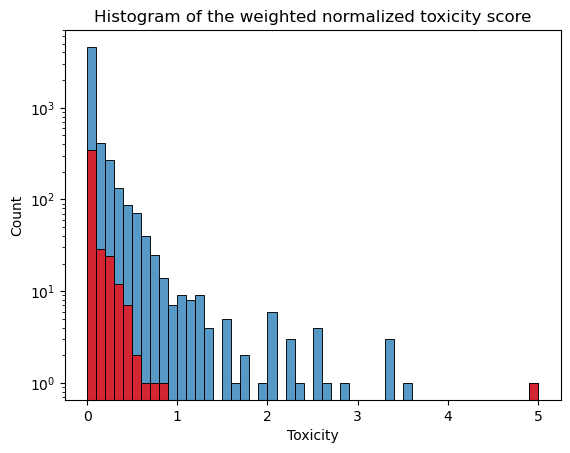

In [128]:
sns.histplot(grouped_df["final_toxicity_score"], bins=50)
sns.histplot(grouped_df_cancer["final_toxicity_score"], bins=50,color="red")

plt.yscale("log")
plt.xlabel("Toxicity")
plt.title("Histogram of the weighted normalized toxicity score")

Text(0.5, 1.0, 'Histogram of toxicity score')

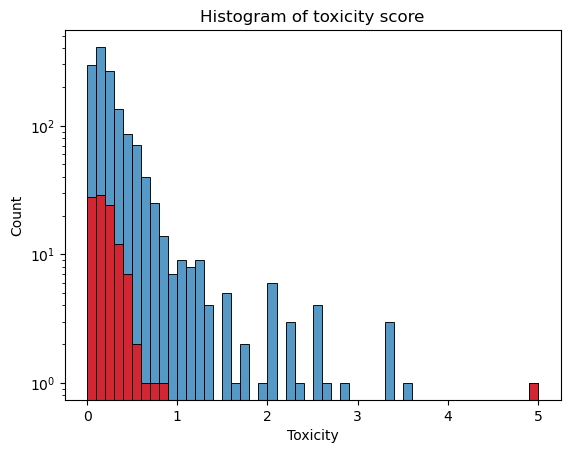

In [129]:
sns.histplot(grouped_df_tox["final_toxicity_score"], bins=50)
sns.histplot(grouped_df_cancer_tox["final_toxicity_score"], bins=50,color="red")

plt.yscale("log")
plt.xlabel("Toxicity")
plt.title("Histogram of toxicity score")

Text(0, 0.5, 'Number of patents approved')

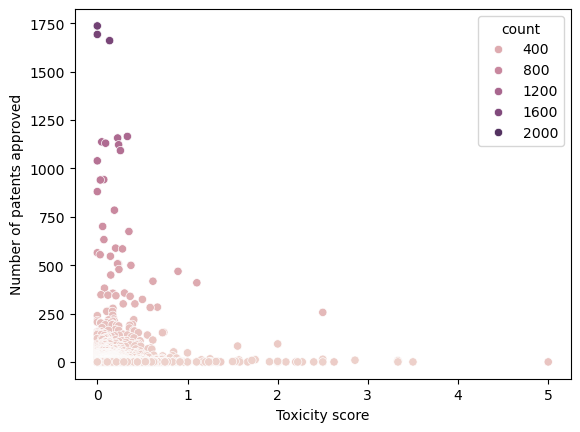

In [113]:
sns.scatterplot(grouped_df,x="final_toxicity_score",y = "drugbank_drug_patent_approved",hue="count",alpha = 1)
plt.xlabel("Toxicity score")
plt.ylabel("Number of patents approved")

Text(0.5, 1.0, 'Number of patents approved vs toxicity score')

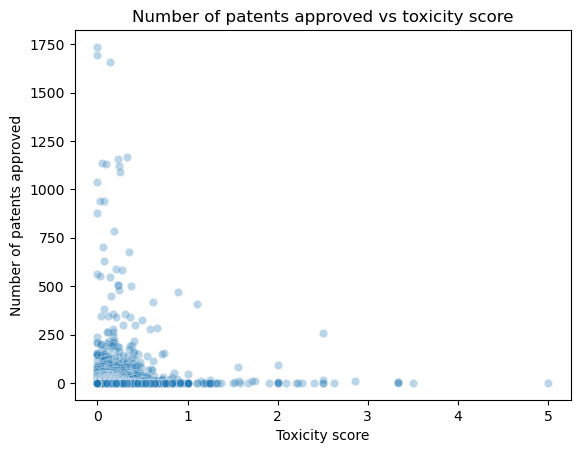

In [114]:
sns.scatterplot(grouped_df,x="final_toxicity_score",y = "drugbank_drug_patent_approved",alpha = 0.3)
plt.xlabel("Toxicity score")
plt.ylabel("Number of patents approved")
plt.title("Number of patents approved vs toxicity score")

Text(0.5, 1.0, 'Number of patents approved vs toxicity score')

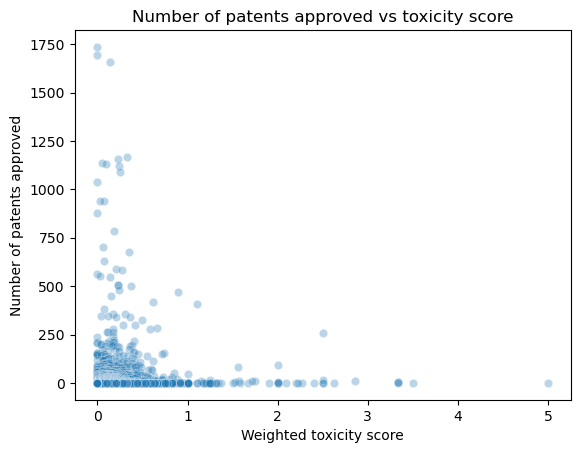

In [115]:
sns.scatterplot(grouped_df,x="final_toxicity_score",y = "drugbank_drug_patent_approved",alpha = 0.3)
plt.xlabel("Weighted toxicity score")
plt.ylabel("Number of patents approved")
# plt.ylim(0,200)
plt.title("Number of patents approved vs toxicity score")

Text(0.5, 1.0, 'Number of patents approved vs toxicity score')

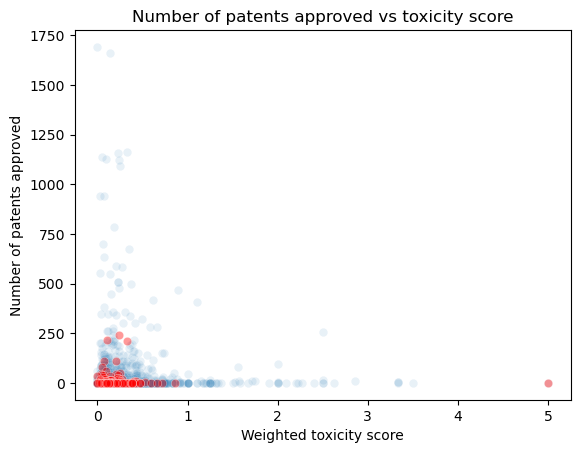

In [131]:
sns.scatterplot(grouped_df_tox,x="final_toxicity_score",y = "drugbank_drug_patent_approved",alpha = 0.1)
sns.scatterplot(grouped_df_cancer_tox,x="final_toxicity_score",y = "drugbank_drug_patent_approved",alpha = 0.4,color="red")

plt.xlabel("Weighted toxicity score")
plt.ylabel("Number of patents approved")
# plt.yscale("log")
# plt.xscale("log")
plt.title("Number of patents approved vs toxicity score")

In [126]:
grouped_df_cancer_tox["final_toxicity_score"].mean(),grouped_df_tox["final_toxicity_score"].mean()

(0.2518301799770069, 0.30570585733237926)

Text(0.5, 1.0, 'Number of BindinDB entries per drug vs toxicity score')

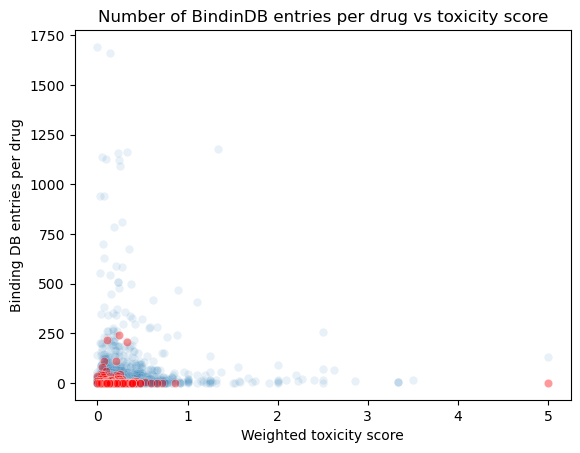

In [130]:
sns.scatterplot(grouped_df_tox,x="final_toxicity_score",y = "count",alpha = 0.1)
sns.scatterplot(grouped_df_cancer_tox,x="final_toxicity_score",y = "count",alpha = 0.4,color="red")
plt.xlabel("Weighted toxicity score")
plt.ylabel("Binding DB entries per drug")
# plt.yscale("log")
plt.title("Number of BindinDB entries per drug vs toxicity score")

Text(0.5, 1.0, 'Number of BindinDB entries per drug vs toxicity score')

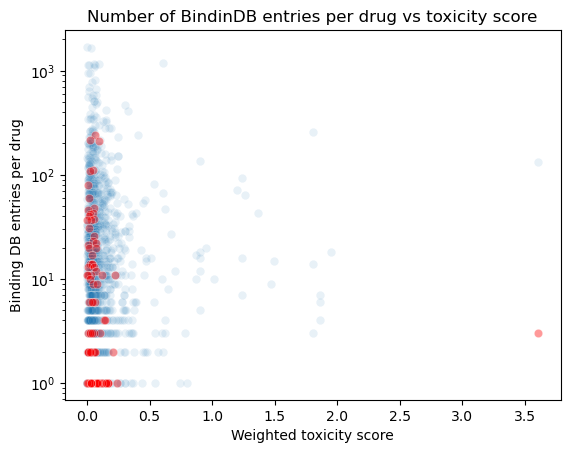

In [123]:
sns.scatterplot(grouped_df_tox,x="final_toxicity_score_log",y = "count",alpha = 0.1)
sns.scatterplot(grouped_df_cancer_tox,x="final_toxicity_score_log",y = "count",alpha = 0.4,color="red")
plt.xlabel("Weighted toxicity score")
plt.ylabel("Binding DB entries per drug")
plt.yscale("log")
plt.title("Number of BindinDB entries per drug vs toxicity score")

<Axes: xlabel='final_toxicity_score', ylabel='drugbank_drug_patent_approved'>

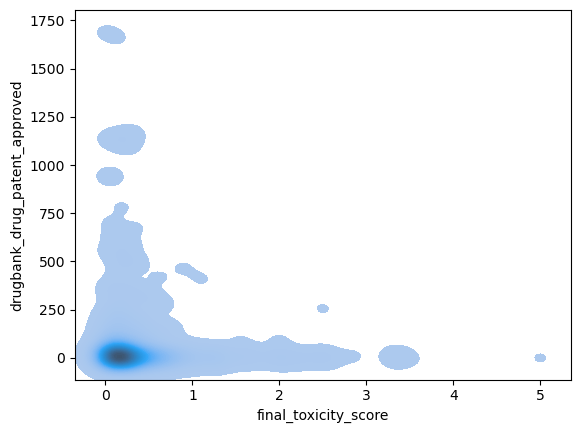

In [118]:
sns.kdeplot(data=grouped_df_tox, x="final_toxicity_score", y="drugbank_drug_patent_approved", fill=True, levels=100, thresh=0.01)

Text(0.5, 1.0, 'Number of proteins per drug vs toxicity score')

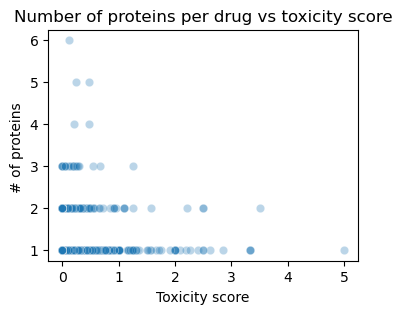

In [119]:
# plot of the number of unique toxicity values per protein
plt.figure(figsize=(4,3))
sns.scatterplot(grouped_df,x="final_toxicity_score",y = "num_prot_per_drug",alpha = 0.3)
plt.xlabel("Toxicity score")
plt.ylabel("# of proteins ")
# plt.yscale("log")
plt.title("Number of proteins per drug vs toxicity score")

<Axes: xlabel='final_toxicity_score', ylabel='num_prot_per_drug'>

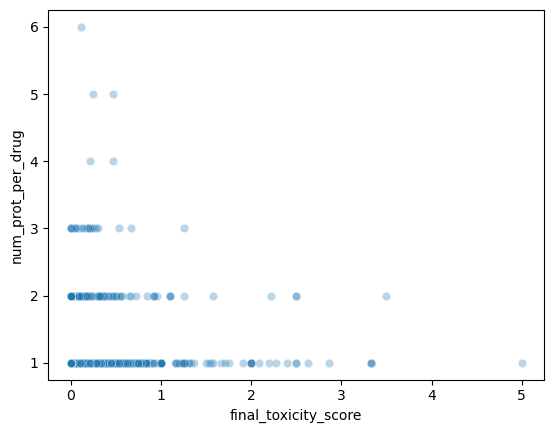

In [120]:
# plot of the number of unique toxicity values per protein
# plt.figure(figsize=(5,5))
sns.scatterplot(grouped_df,x="final_toxicity_score",y = "num_prot_per_drug",alpha = 0.3)

In [121]:
from scipy.stats import pearsonr, spearmanr

# Pearson correlation (linear relationship)
pearson_corr, p_val = pearsonr(grouped_df['weighted_toxicity_score_normalized'], grouped_df['drugbank_drug_patent_approved'])
print(f"Pearson Correlation: {pearson_corr}, P-value: {p_val}")

# Spearman correlation (monotonic relationship)
spearman_corr, p_val = spearmanr(grouped_df['weighted_toxicity_score_normalized'], grouped_df['drugbank_drug_patent_approved'])
print(f"Spearman Correlation: {spearman_corr}, P-value: {p_val}")

KeyError: 'weighted_toxicity_score_normalized'

In [47]:
from scipy.stats import pearsonr, spearmanr
grouped_df2 = grouped_df.copy()
# Calculate the reciprocal of the normalized toxicity score
grouped_df2['reciprocal_toxicity_score'] = np.power(grouped_df2['weighted_toxicity_score_normalized'], -1)

# Handle potential division by zero or infinite values
grouped_df2['reciprocal_toxicity_score'].replace([float('inf'), -float('inf')], np.nan, inplace=True)
grouped_df2.dropna(subset=['reciprocal_toxicity_score'], inplace=True)

# Pearson correlation (linear relationship)
pearson_corr, p_val = pearsonr(grouped_df2['reciprocal_toxicity_score'], grouped_df2['drugbank_drug_patent_approved'])
print(f"Pearson Correlation (reciprocal): {pearson_corr}, P-value: {p_val}")

# Spearman correlation (monotonic relationship)
spearman_corr, p_val = spearmanr(grouped_df2['reciprocal_toxicity_score'], grouped_df2['drugbank_drug_patent_approved'])
print(f"Spearman Correlation (reciprocal): {spearman_corr}, P-value: {p_val}")


Pearson Correlation (reciprocal): 0.025305383091853317, P-value: 0.35900080825423797
Spearman Correlation (reciprocal): 0.15631422924583024, P-value: 1.1963047759652398e-08


/var/folders/_h/sv2httr97w1d8pv18rsdrqhc0000gn/T/ipykernel_3563/1165852594.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  grouped_df2['reciprocal_toxicity_score'].replace([float('inf'), -float('inf')], np.nan, inplace=True)


Text(0.5, 1.0, 'Number of patents approved vs toxicity score')

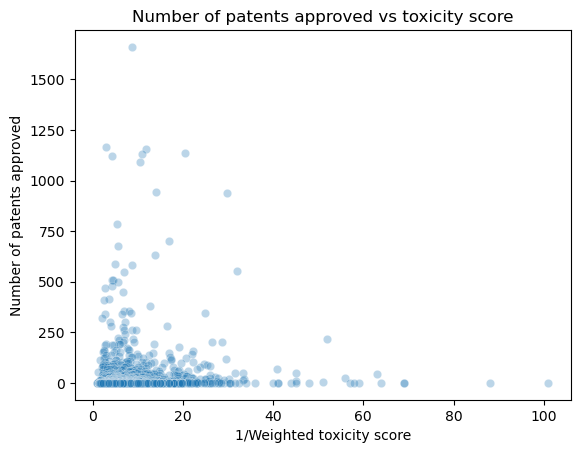

In [ ]:
sns.scatterplot(grouped_df2,x="reciprocal_toxicity_score",y = "drugbank_drug_patent_approved",alpha = 0.3)
plt.xlabel("1/Weighted toxicity score")
plt.ylabel("Number of patents approved")
plt.title("Number of patents approved vs toxicity score")

### Power law test 

                            OLS Regression Results                            
Dep. Variable:            log_patents   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6411
Date:                Fri, 13 Dec 2024   Prob (F-statistic):              0.424
Time:                        14:34:15   Log-Likelihood:                -1370.8
No. Observations:                 736   AIC:                             2746.
Df Residuals:                     734   BIC:                             2755.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.0083      0.134     22.471   

/var/folders/_h/sv2httr97w1d8pv18rsdrqhc0000gn/T/ipykernel_3563/3677948824.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['log_toxicity'] = np.log(filtered_df['final_toxicity_score'])
/var/folders/_h/sv2httr97w1d8pv18rsdrqhc0000gn/T/ipykernel_3563/3677948824.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['log_patents'] = np.log(filtered_df['drugbank_drug_patent_approved'])


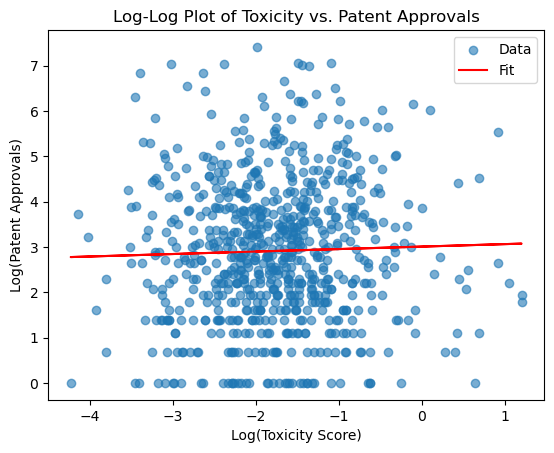

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Filter out rows where scores or approvals are zero (logarithm undefined)
filtered_df = grouped_df[(grouped_df['final_toxicity_score'] > 0) & 
                         (grouped_df['drugbank_drug_patent_approved'] > 0)]

# Log transformation
filtered_df['log_toxicity'] = np.log(filtered_df['final_toxicity_score'])
filtered_df['log_patents'] = np.log(filtered_df['drugbank_drug_patent_approved'])

# Fit a linear regression model
X = sm.add_constant(filtered_df['log_toxicity'])
y = filtered_df['log_patents']
model = sm.OLS(y, X).fit()

# Print results
print(model.summary())

# Plot the relationship
plt.scatter(filtered_df['log_toxicity'], filtered_df['log_patents'], alpha=0.6, label="Data")
plt.plot(filtered_df['log_toxicity'], model.predict(X), color='red', label="Fit")
plt.xlabel("Log(Toxicity Score)")
plt.ylabel("Log(Patent Approvals)")
plt.legend()
plt.title("Log-Log Plot of Toxicity vs. Patent Approvals")
plt.show()


### Linear regression

Slope: -15.064812836110814
Intercept: 39.371022280270765
R-squared: 0.0024882991343879207
P-value: 0.06394833216994579


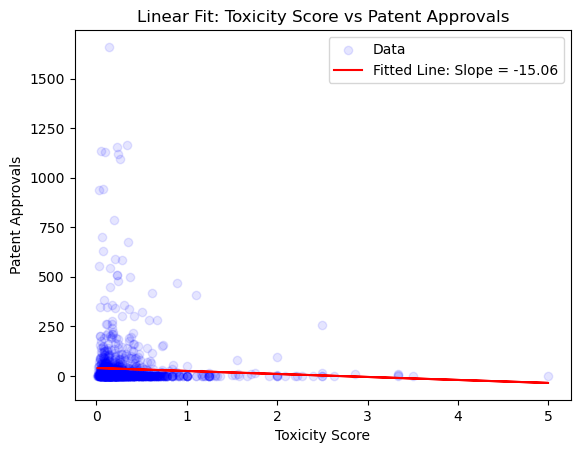

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

temp = grouped_df.copy()
temp = temp.loc[temp['final_toxicity_score'] > 0]
# Fit a linear regression with normal data
X = np.array(temp['final_toxicity_score'])
y = np.array(temp['drugbank_drug_patent_approved'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

# Plot the data points
plt.scatter(X, y, color='blue', label='Data',alpha = 0.1)

# Plot the fitted line
plt.plot(X, slope*X + intercept, color='red', label=f"Fitted Line: Slope = {slope:.2f}")
plt.xlabel("Toxicity Score")
plt.ylabel("Patent Approvals")
plt.title("Linear Fit: Toxicity Score vs Patent Approvals")
plt.legend()
plt.show()


In [51]:
len(X[X<0.1]), len(X[(X>0.2) & (X<1)])

(266, 631)

In [52]:
# Inverse relationship test: Reversing one variable (e.g., patent approval)
reversed_pearson_corr, reversed_p_val = pearsonr(X,y)
print(f"Reversed Pearson Correlation: {reversed_pearson_corr}, P-value: {reversed_p_val}")


Reversed Pearson Correlation: -0.04988285411228935, P-value: 0.06394833216994408


In [53]:
# Spearman correlation (monotonic relationship)
spearman_corr, p_val = spearmanr(X,y)
print(f"Spearman Correlation: {spearman_corr}, P-value: {p_val}")

Spearman Correlation: -0.20226209958228464, P-value: 3.313965953381458e-14


In [54]:
# print each line of content of grouped_df_tox.loc[grouped_df_tox["weighted_toxicity_score_normalized"]==0,"unique_toxicity"] with a loop to see the whole string$

for index, row in grouped_df_tox.loc[grouped_df_tox["weighted_toxicity_score_normalized"]==0].iterrows():
    print(row["unique_toxicity"])


The maximally tolerated dose for rat, mouse, and dog when given orally is greater than 500 mg/kg. The maximally tolerated dose of a non-human primate is greater 1200 mg/kg. 
LD<sub>50</sub>=63 mg/kg (rats, IV)
Data is not available.
The LD<sub>50</sub> of intravenous trimetrexate in mice is 62 mg/kg (186 mg/m<sup>2</sup>). Myelosuppression is a dose-limiting toxic effect.


Oral rat LD<sub>50</sub>: 780mg/kg
LD<sub>50</sub> = 1100 mg/kg (rat, oral), 228 mg/kg (mouse, oral)
ORL-RAT LD<sub>50</sub>: &gt; 5g/kg.

LD<sub>50</sub>=65 mg/kg (Orally in mice)
Oral LD<sub>50</sub> in rat is 7060 mg/kg. Oral LD<sub>50</sub> in mouse is 3450 mg/kg.
Oral, mouse: LD<sub>50</sub> = 750 mg/kg; Oral, rat: LD<sub>50</sub> = 500 mg/kg.
Oral LD<sub>50</sub> in rats is > 2 g/kg.
Possible human carcinogen. May cause reproductive harm. ORL-RAT LD<sub>50</sub> 420 mg/kg; IPR-RAT LD<sub>50</sub> 44 mg/kg; IVN-RAT LD<sub>50</sub> 15 mg/kg; ORL-MUS LD<sub>50</sub> 200 mg/kg; SCU-MUS LD<sub>50</sub> 52 mg/kg; IP